#  SVM 

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import pandas as pd
import numpy as np
import csv
import random as rnd
import os 
import matplotlib.pyplot as plt
%matplotlib inline
from pybrain.tools.shortcuts import buildNetwork
from pybrain.datasets import SupervisedDataSet
from pybrain.supervised.trainers import BackpropTrainer
from sklearn.metrics import confusion_matrix
import sklearn.svm
import math

In [2]:
import tensorflow as tf

In [10]:
import numpy as np

In [6]:
df=pd.read_csv("andSVM_2.csv")

In [53]:
df.head()

,X1,X2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1
4,2,3,1


In [7]:
x=df[['X1','X2']]
y=df[['y']]

### Primero usamos una red neuronal para resolver el problema

In [12]:
x_nn=np.asarray(x)
y_nn=np.asarray(y)

In [15]:
y_nn

array([[0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int64)

In [16]:
input_size=2
output_layer_size=1
x = tf.placeholder(tf.float32, [None, input_size])
y_ = tf.placeholder(tf.float32, [None, output_layer_size])
W_layer1=tf.Variable(tf.random_uniform([input_size,output_layer_size], -1, 1), name="W_layer1")
b_layer1 = tf.Variable(tf.zeros([output_layer_size]), name="b_layer1")

In [17]:
y = tf.nn.sigmoid(tf.matmul(x,W_layer1)+b_layer1) 
lossfn = tf.reduce_mean(tf.reduce_sum((y_-y)**2)) 
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)

In [18]:
init = tf.initialize_all_variables()
sess = tf.Session() 

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [19]:
sess.run(init)
for i in range(5000):
  sess.run(train_step, feed_dict={x: x_nn, y_: y_nn})

In [20]:
correct_prediction = tf.equal(tf.round(y),y_) 
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: x_nn, y_: y_nn})) 

1.0


In [23]:
w=[sess.run(b_layer1, feed_dict={x: x_nn, y_: y_nn})[0]]+[i[0] for i in sess.run(W_layer1, feed_dict={x: x_nn, y_: y_nn})]

In [24]:
m=((w[0]/w[2]))/((-w[0]/w[1]))

(-5.2, 5.2)

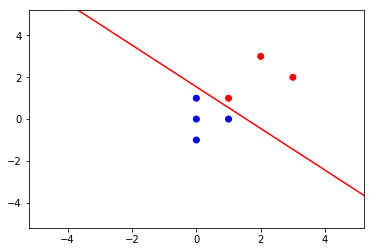

In [26]:
plt.scatter(x_nn[:,0],x_nn[:,1],c=['red' if i==1 else 'blue' for i in y_nn])
x2 = np.linspace(-5.2,5.2,100) # 100 numeros espaciados
plt.plot(x2,-w[0]/w[2]+m*x2,color='red')
plt.ylim([-5.2,5.2])
plt.xlim([-5.2,5.2])

### Usamos una svm con un kernel lineal para resolver el problema de AND C=1

In [56]:
clf=sklearn.svm.SVC(kernel='linear')
clf.fit(x,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [59]:
w0=clf.intercept_[0]
w1=clf.coef_[0][0]
w2=clf.coef_[0][1]

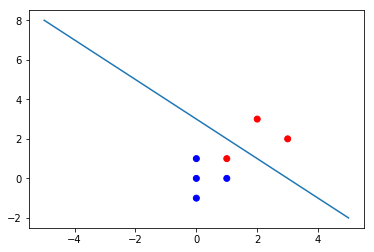

In [66]:
plt.scatter(df['X1'],df['X2'],c=['red' if i==1 else 'blue' for i in df['y']])
xg=np.linspace(-5,5)
yg=-w0/w2 -w1/w2*xg
plt.plot(x,y)

Graficamos coloreando los vectores de soporte

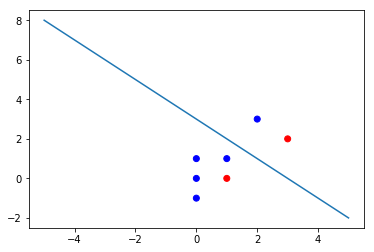

In [63]:
x=np.linspace(-5,5)
y=-w0/w2 -w1/w2*x
plt.scatter(df[['X1']],df[['X2']], c=['red' if df.y[i]==1 else 'blue' for i in clf.support_])
plt.plot(x,y)

### Usamos una svm con un kernel lineal para resolver el problema de AND C=100

In [74]:
clf=sklearn.svm.SVC(kernel='linear', C=100)
clf.fit(x,y)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [75]:
w0=clf.intercept_[0]
w1=clf.coef_[0][0]
w2=clf.coef_[0][1]

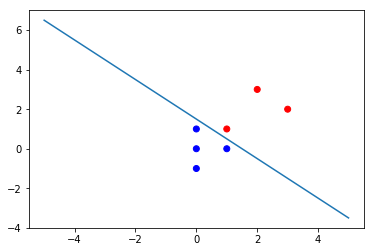

In [77]:
plt.scatter(df['X1'],df['X2'],c=['red' if i==1 else 'blue' for i in df['y']])
xg=np.linspace(-5,5)
yg=-w0/w2 -w1/w2*xg
plt.plot(xg,yg)

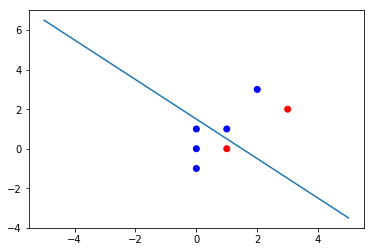

In [78]:
plt.scatter(df[['X1']],df[['X2']], c=['red' if df.y[i]==1 else 'blue' for i in clf.support_])
plt.plot(xg,yg)

Con una C más alta, la SVM logro poner la barrera de decisión justo en el punto que separa correctamente ambos grupos. Sin embargo, los vctores de soporte siguen siendo los mismos

### Circulo con SVM

In [28]:
Xs = pd.DataFrame(np.random.uniform(-6,6,2000),columns=['x1'])
Xs['x2'] = np.random.uniform(-6,6,2000)

In [29]:
Xs['y']=np.where((Xs['x1']**2+Xs['x2']**2<9),1,0)

In [31]:
xc=Xs[['x1','x2']]
yc=Xs[['y']]

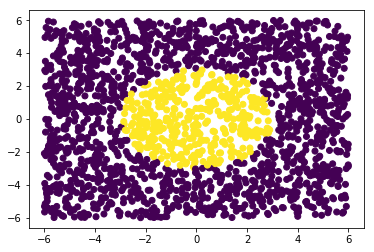

In [30]:
plt.scatter(Xs['x1'], Xs['x2'], c=Xs['y'])

De acuerdo con la documentación de sklearn (http://scikit-learn.org/stable/modules/svm.html) el kernel que nos conviene es el rbf

In [32]:
circ=sklearn.svm.SVC(kernel='rbf')
circ.fit(xc,yc)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [35]:
yp=circ.predict(xc)

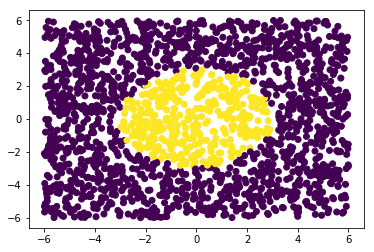

In [37]:
plt.scatter(Xs['x1'], Xs['x2'], c=yp)

In [38]:
confusion_matrix(yc, yp)

array([[1602,    2],
       [   6,  390]])

Con la SVM los elementos mal clasificados son sólo 8 de 2000